In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('Sales Data.csv',encoding='unicode_escape')
#unicode escape used to avoid encoding error

In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [16]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(11239, 13)

In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [19]:
df['Amount'].dtypes
df.columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [25]:
# Exploratory Data Analysis

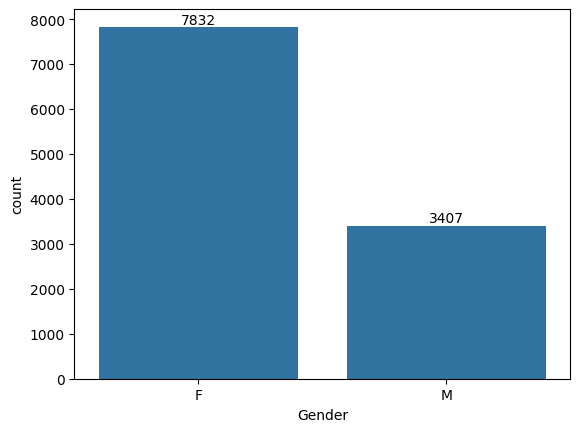

In [28]:
ax = sns.countplot(x = 'Gender', data=df)

for numbers in ax.containers:
        ax.bar_label(numbers)

In [29]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

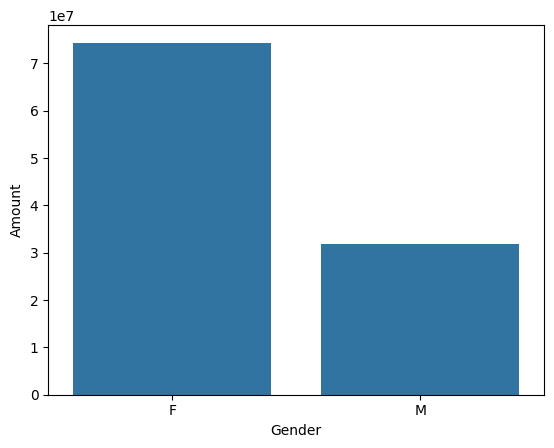

In [33]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount', data = sales_gen)


In [34]:
## From above graphs we can see that most of the buyers are females and purchasing power of females area higher than men

In [35]:
# AGE

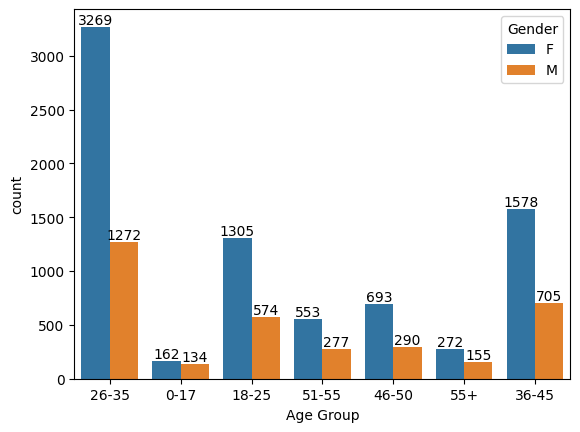

In [36]:
ax = sns.countplot(data=df, x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

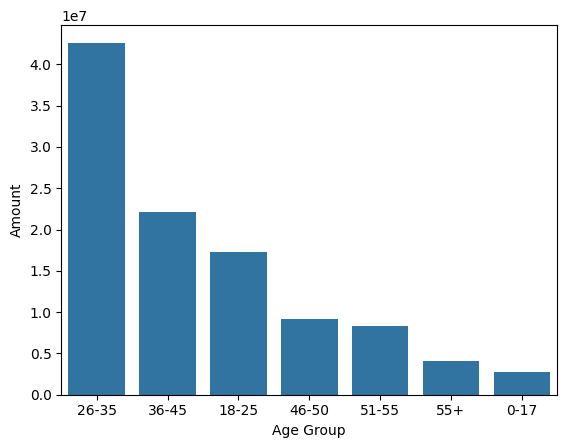

In [41]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

In [42]:
## From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

In [43]:
# State

<Axes: xlabel='State', ylabel='Orders'>

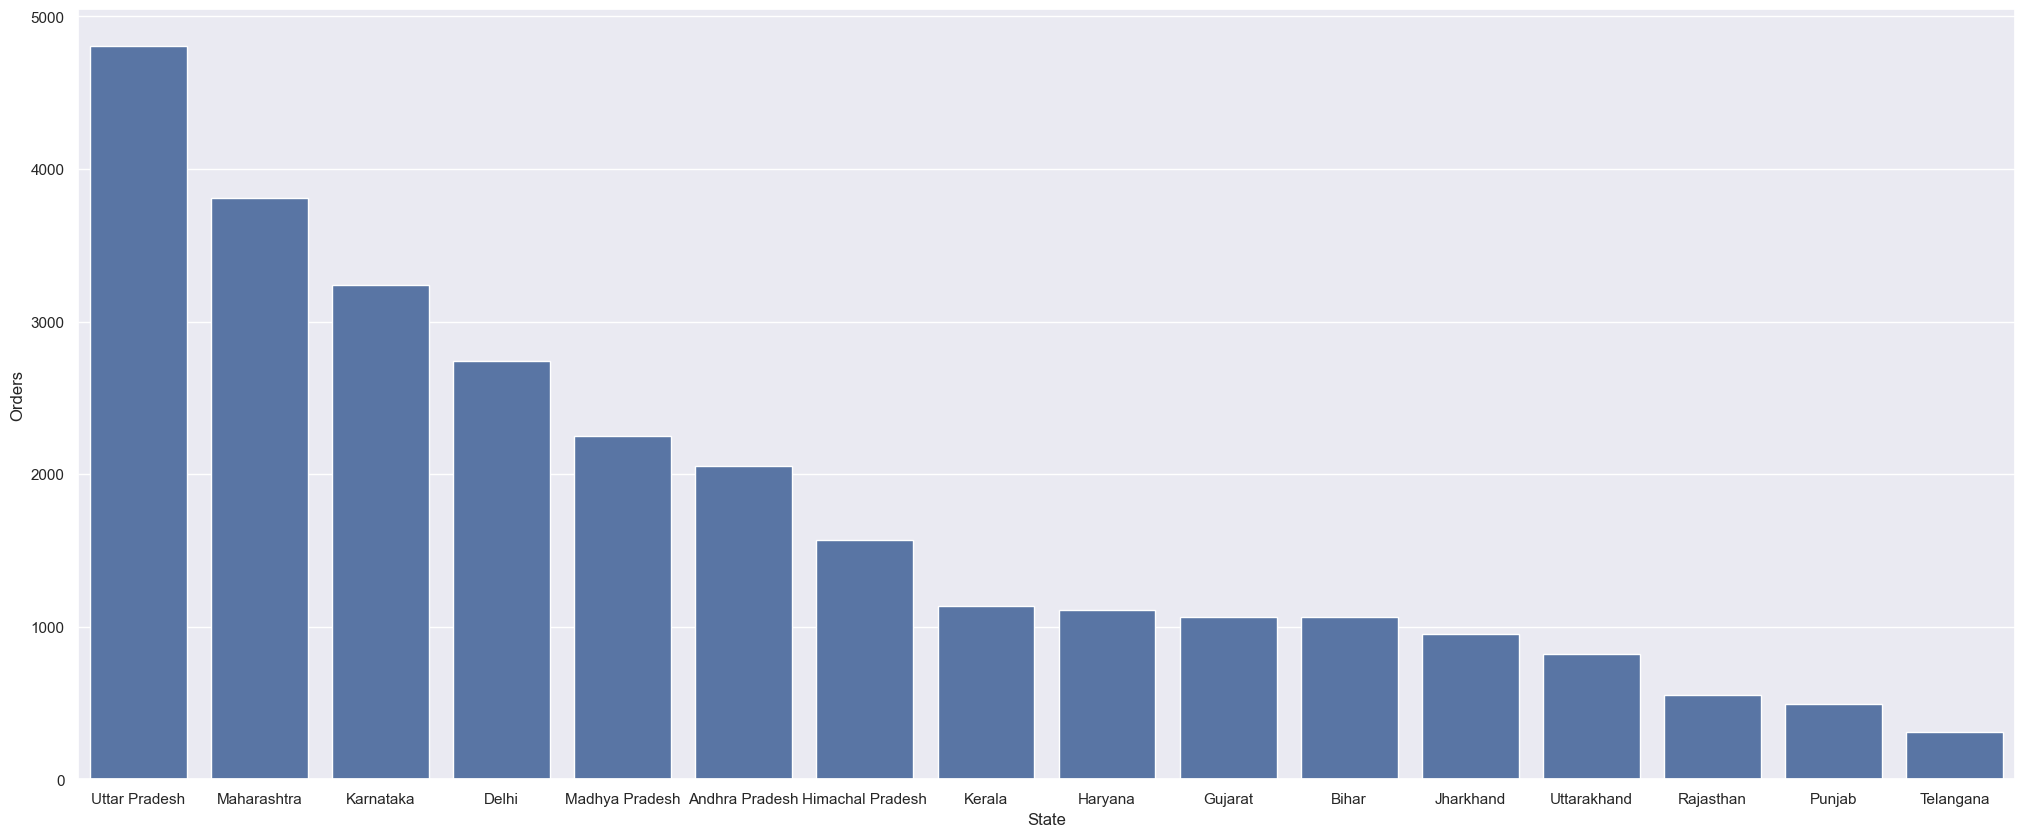

In [50]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x='State',y='Orders')

In [51]:
# Marital Status

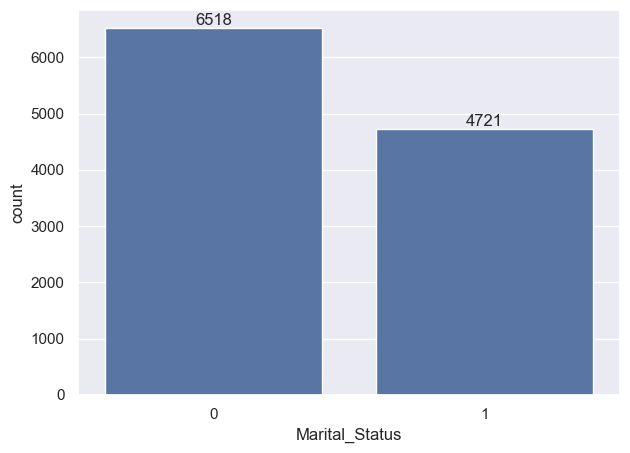

In [58]:
ax = sns.countplot(data = df, x='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

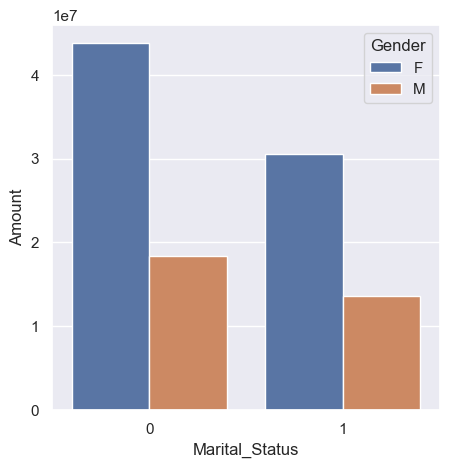

In [60]:
sales_married = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_married,x='Marital_Status',y='Amount',hue='Gender')

In [64]:
#From the graph we obsereve that the purchasing power of married women is higher than others.

In [62]:
#Occupation

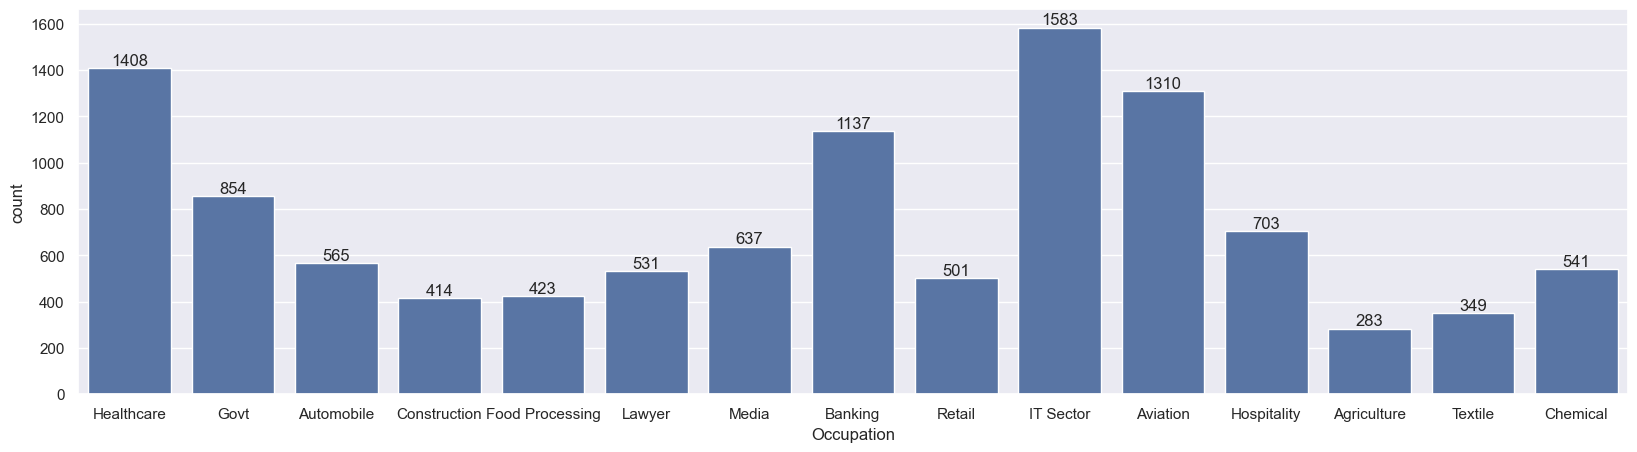

In [68]:
ax = sns.countplot(data = df,x='Occupation')
sns.set(rc={'figure.figsize':(25,15)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

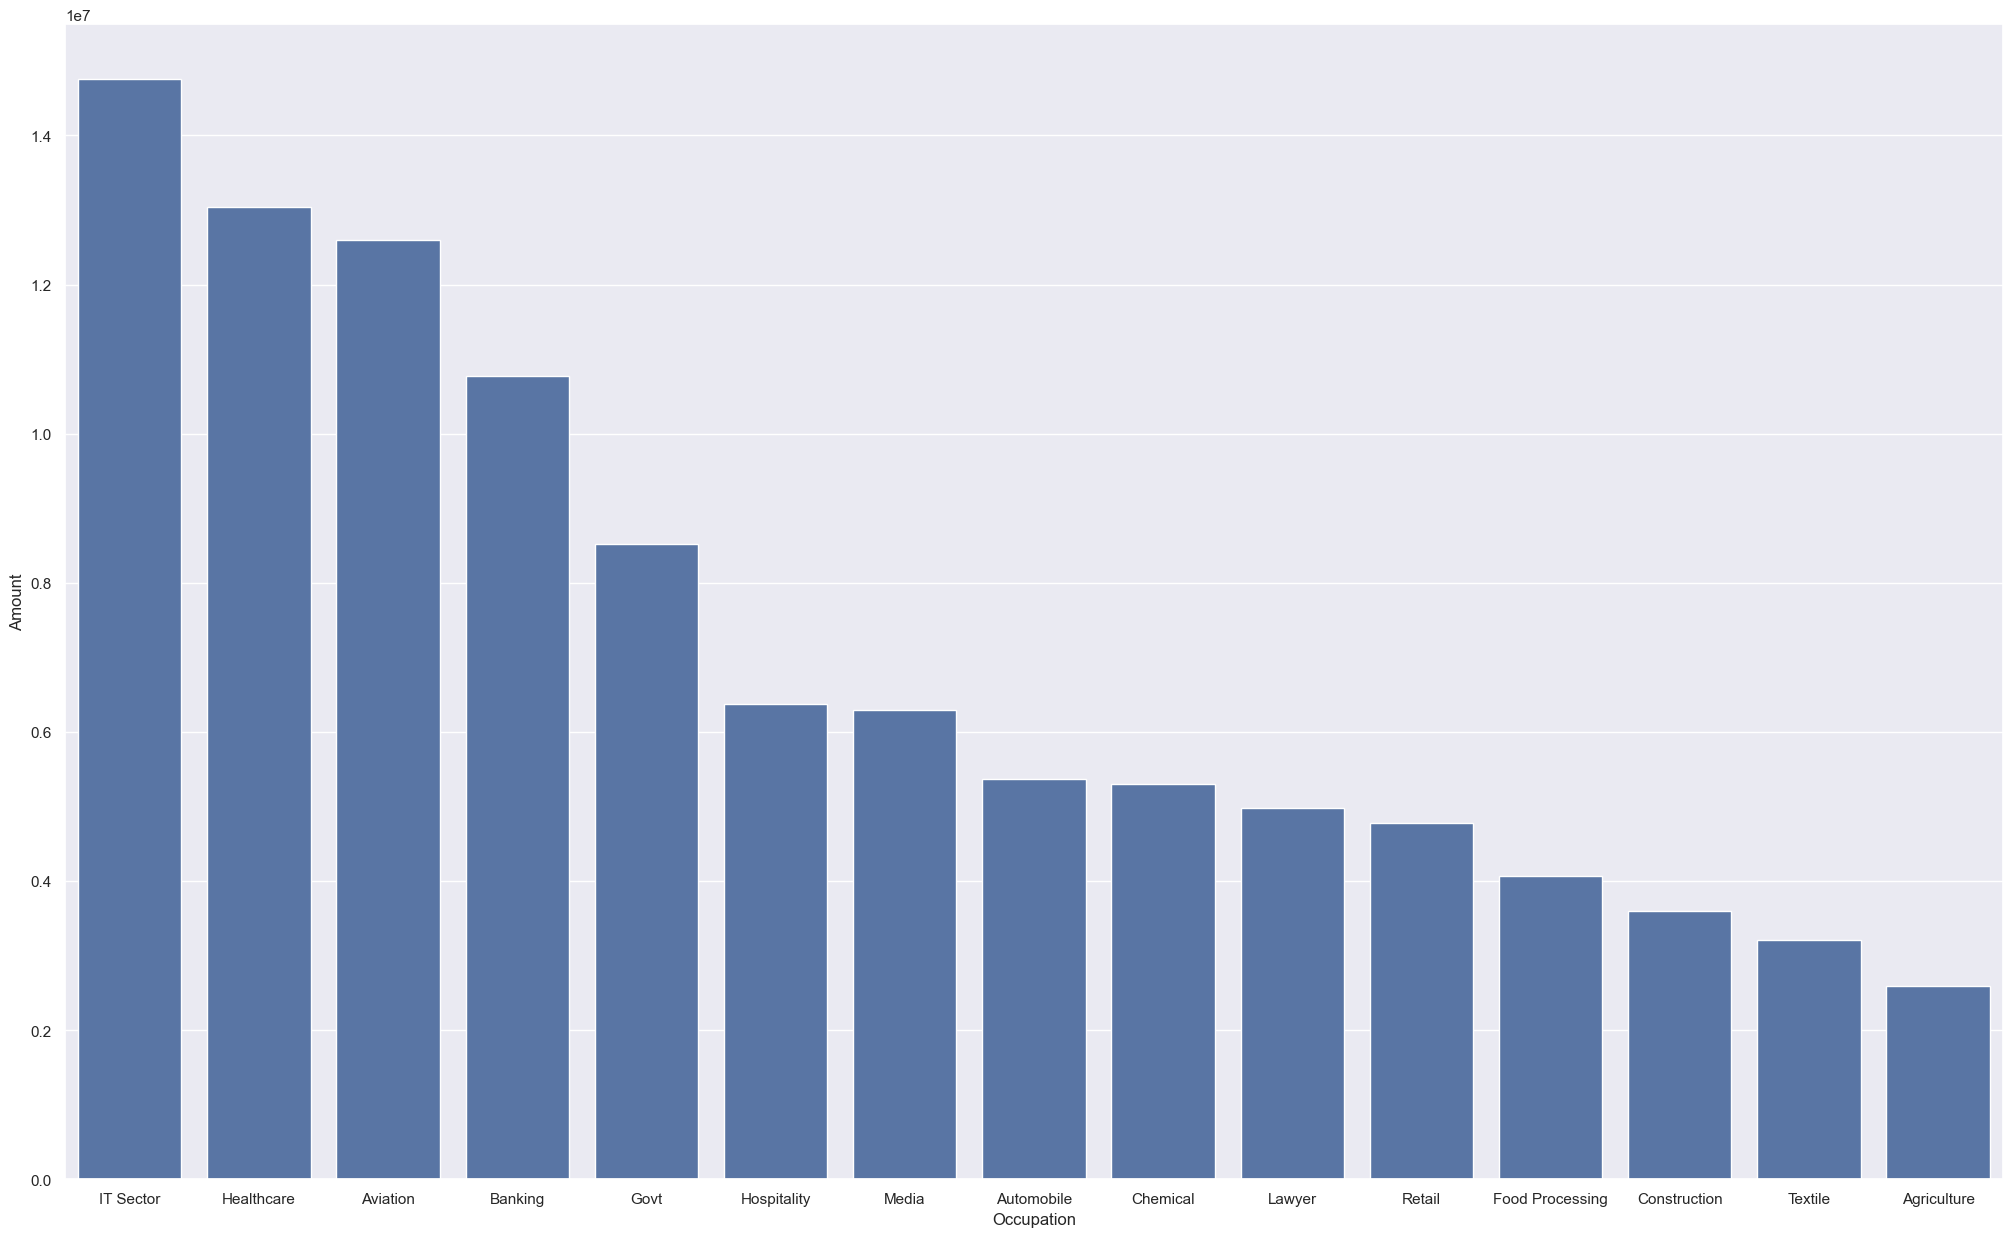

In [74]:
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_occupation,x='Occupation',y='Amount')

In [76]:
#From above graph we can see that most of the buyers are working in IT, Aviation and Healthcare sector#

In [77]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

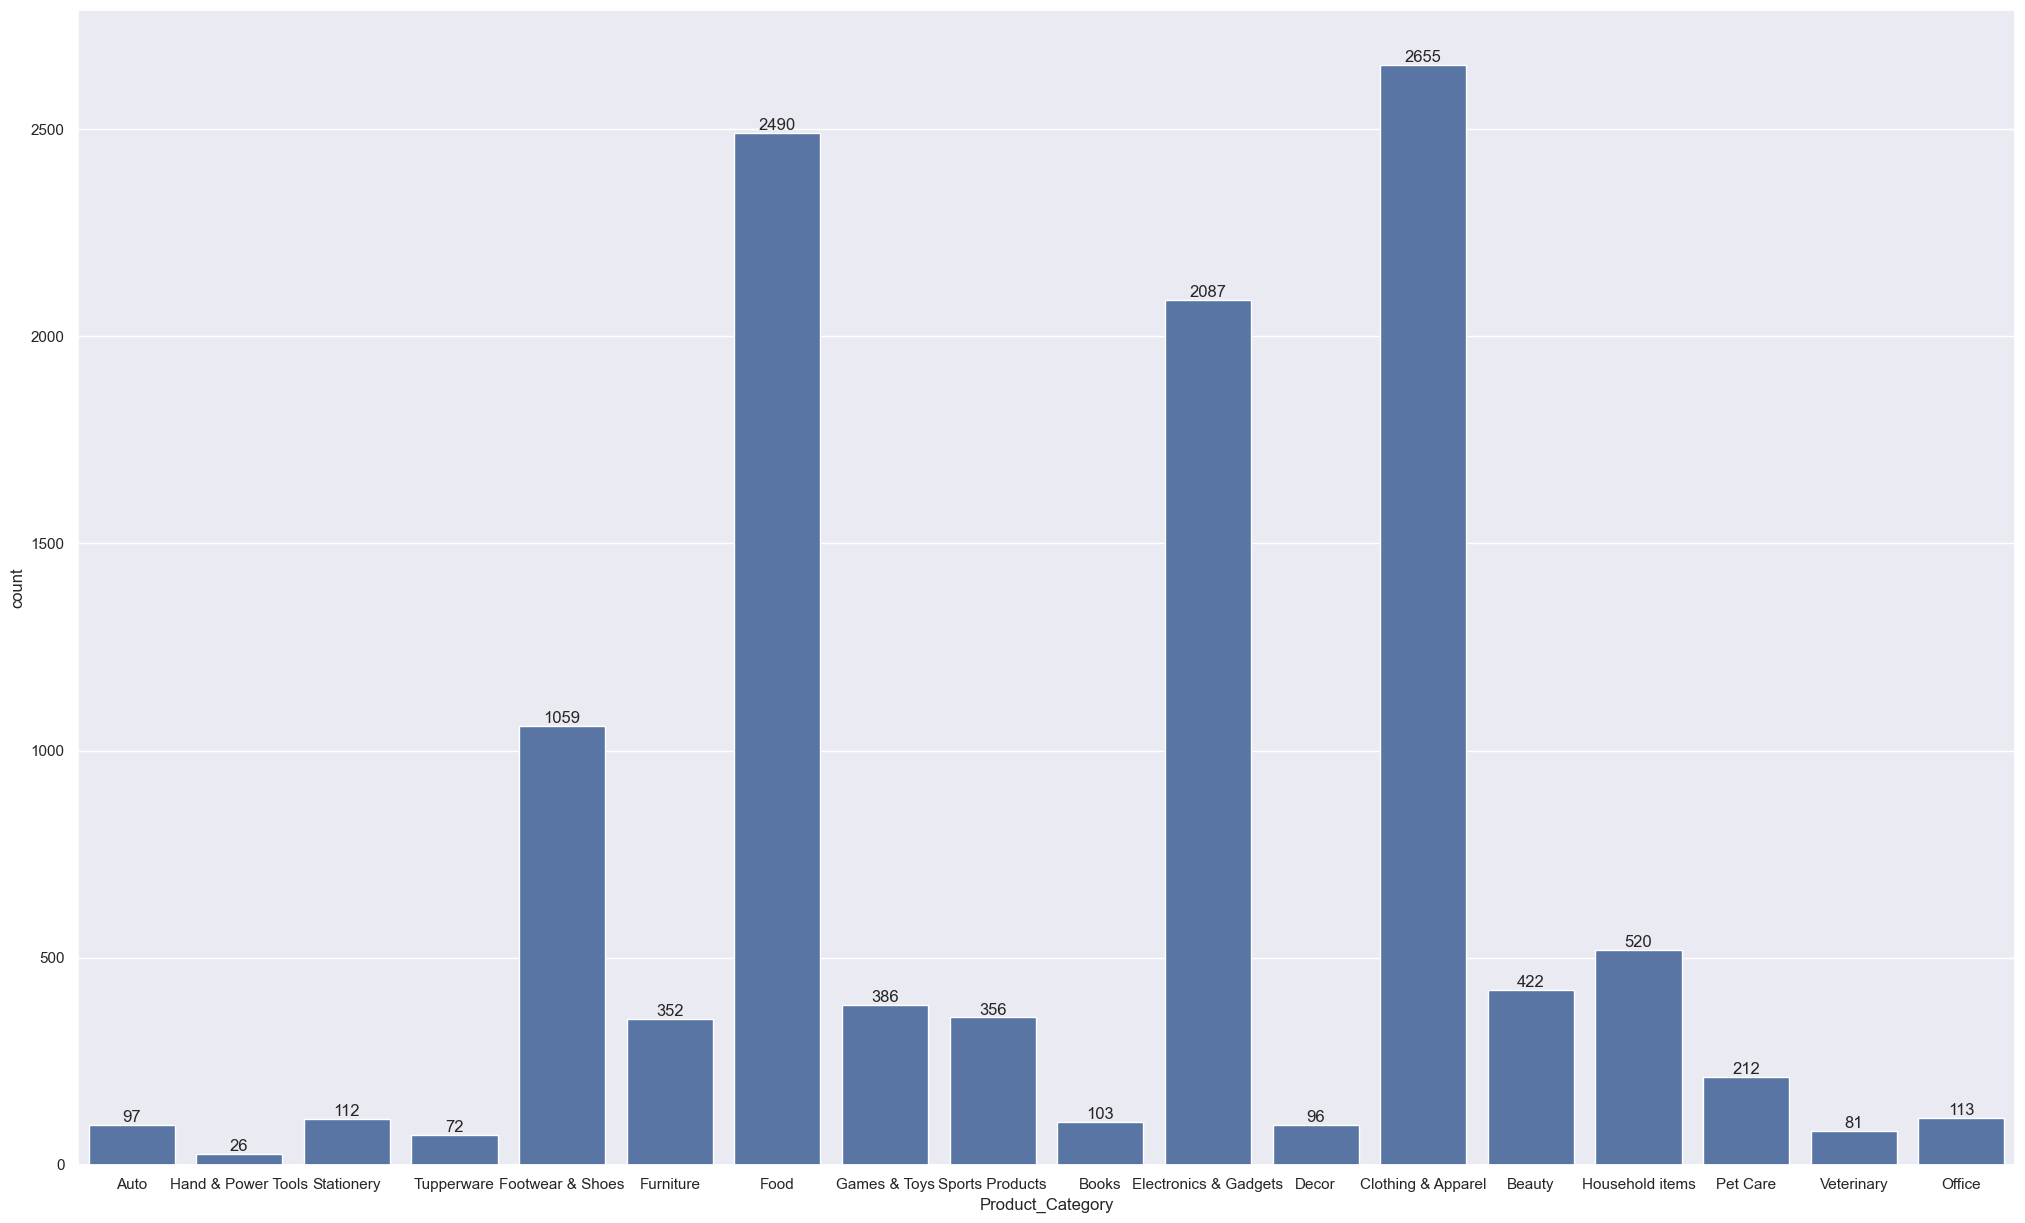

In [78]:
ax = sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

(None,)

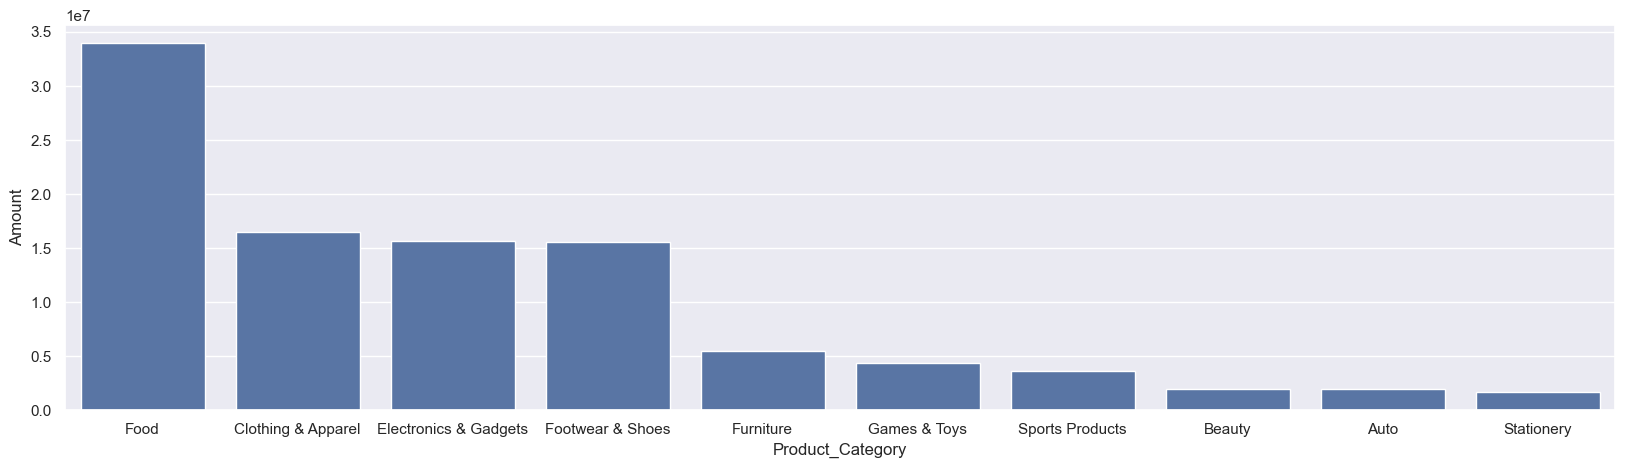

In [87]:
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales_product,x='Product_Category',y='Amount')
sns.set(rc={'figure.figsize':(20,5)}),

In [88]:
# From above we can see that the most sold products are Food, Clothing and Electronics

(None,)

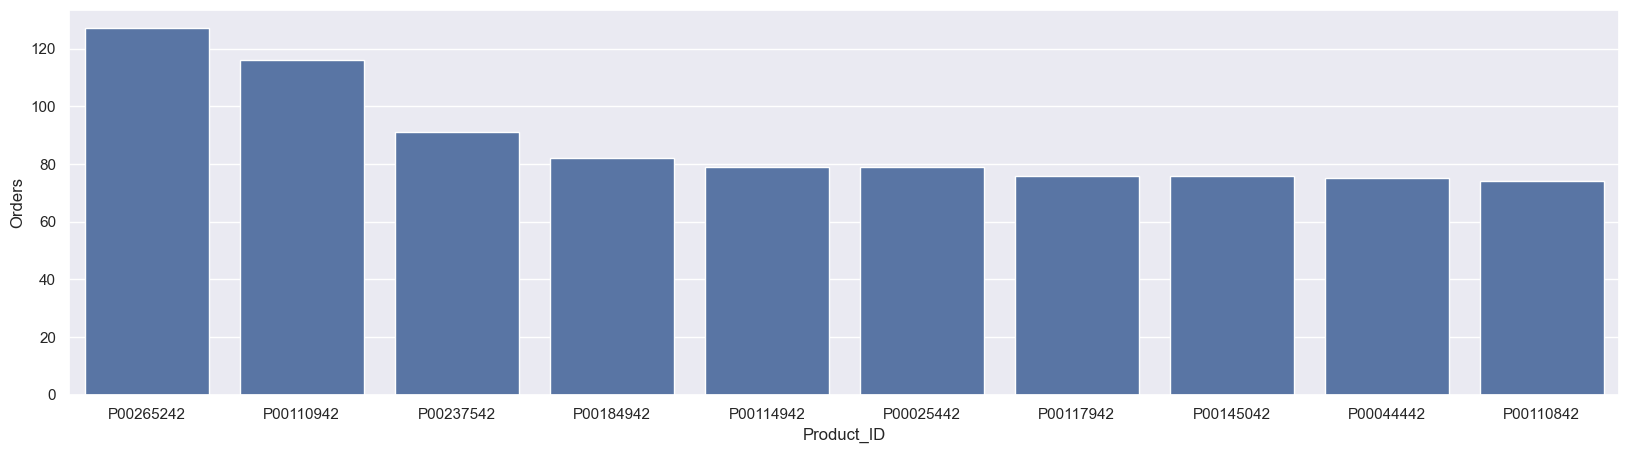

In [97]:
sales_id = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sales_id,x='Product_ID',y='Orders')
sns.set(rc={'figure.figsize':(20,5)}),

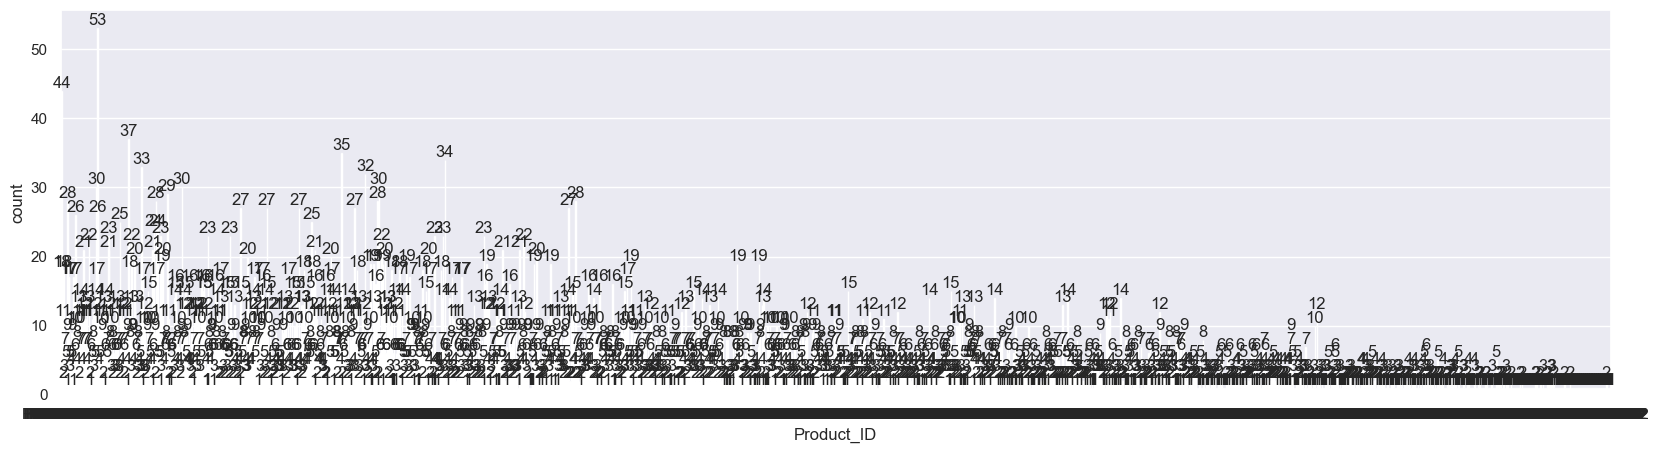

In [95]:
ax = sns.countplot(data=df,x='Product_ID')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_ID'>

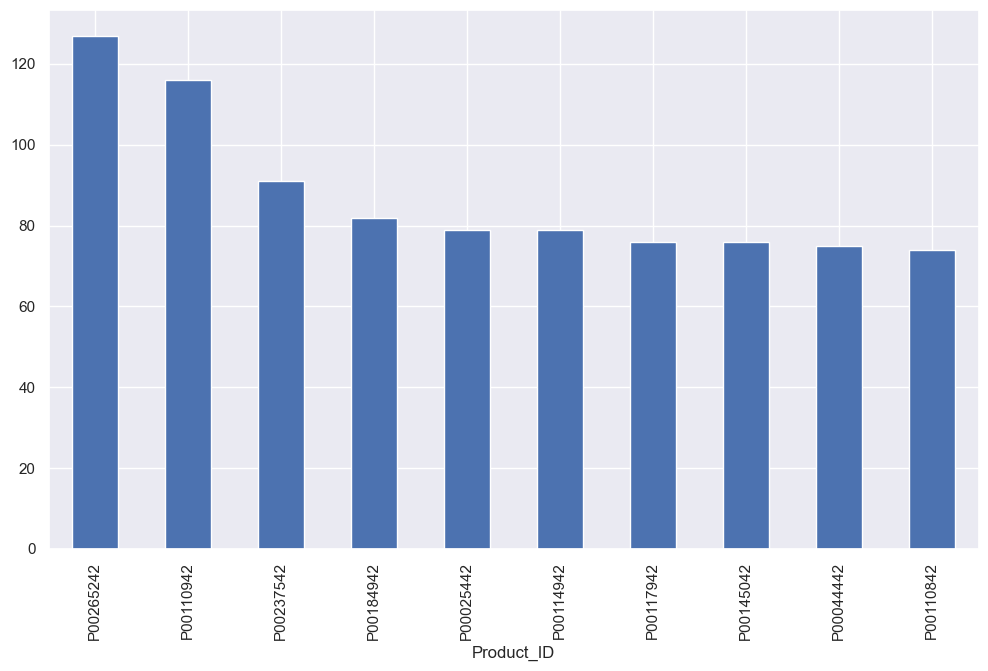

In [99]:
#Top 10 most sold products (same thing as above)
fig1,ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Married women aged from 26-35 years from UP, Maharastra and Karnataka working in IT,
# Healthcare and Aviation are more likely to buy produtcs from Food, Clothing and Electronics Category.